In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Draw inline
%matplotlib inline

path = '/Users/Kevin/Desktop/DataKind/womens-health-project/data/current/DWWC Bookings-2017-03-07-Add-Age.csv'

In [12]:
%%bash
file -I "/Users/Kevin/Desktop/DataKind/womens-health-project/data/current/DWWC Bookings-2017-03-07-Add-Age.csv"


/Users/Kevin/Desktop/DataKind/womens-health-project/data/current/DWWC Bookings-2017-03-07-Add-Age.csv: text/plain; charset=us-ascii


In [13]:
df=pd.read_csv(path, encoding='ascii')

In [14]:
df.head()

,ID,date_submitted,date_of_birth,preferred_contact,preferred_contact_e-mail,preferred_contact_phone,preferred_contact_text,return_patient,choose_clinic,service_required,smear_test_calc_flag,preferred_appt_date,preferred_time_of_day,preferred_time_morning,preferred_time_afternoon,preferred_time_evening,age
0,4420,03/02/2017,04/01/1995,phone,0,1,0,No,Coolock,Mirena / Jaydess Consultation,NaN,09/02/2017,Evening,0,0,1,22.083504
1,4419,03/02/2017,26/03/1992,e-mail,1,0,0,No,Liffey Street,General Counselling,NaN,11/02/2017,"Morning,Afternoon,Evening",1,1,1,24.859685
2,4418,03/02/2017,09/01/1987,e-mail,1,0,0,No,Liffey Street,Pregnancy Testing,NaN,07/02/2017,Afternoon,0,1,0,30.069815
3,4417,03/02/2017,NaN,phone,0,1,0,Yes,Pembroke Road,Cervical Smear Test,unchecked,06/02/2017,Afternoon,0,1,0,NaN
4,4416,03/02/2017,01/12/1994,"phone,e-mail",1,1,0,No,Liffey Street,Contraception services,NaN,03/02/2017,"Morning,Afternoon,Evening",1,1,1,22.176591


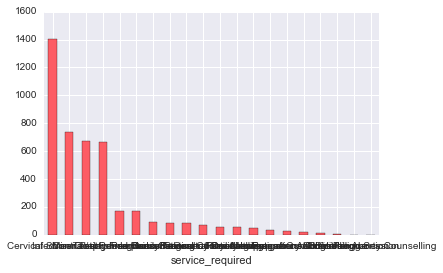

In [15]:
df.service_required.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('service_required')
sns.despine()

In [16]:
df2 = df[df['preferred_time_morning'] == 1]
df2['Time of Day'] = 'Morning'


/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
df3 = df[df['preferred_time_afternoon'] == 1]
df3['Time of Day'] = 'Afternoon'

/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
df4 = df[df['preferred_time_evening'] == 1]
df4['Time of Day'] = 'Evening'

/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
df5 = df2.append(df3).append(df4)

In [20]:
df5.head()

,ID,date_submitted,date_of_birth,preferred_contact,preferred_contact_e-mail,preferred_contact_phone,preferred_contact_text,return_patient,choose_clinic,service_required,smear_test_calc_flag,preferred_appt_date,preferred_time_of_day,preferred_time_morning,preferred_time_afternoon,preferred_time_evening,age,Time of Day
1,4419,03/02/2017,26/03/1992,e-mail,1,0,0,No,Liffey Street,General Counselling,NaN,11/02/2017,"Morning,Afternoon,Evening",1,1,1,24.859685,Morning
4,4416,03/02/2017,01/12/1994,"phone,e-mail",1,1,0,No,Liffey Street,Contraception services,NaN,03/02/2017,"Morning,Afternoon,Evening",1,1,1,22.176591,Morning
6,4414,02/02/2017,05/05/1987,e-mail,1,0,0,No,Liffey Street,Infection Testing,NaN,04/02/2017,Morning,1,0,0,29.749487,Morning
9,4411,02/02/2017,05/05/1987,e-mail,1,0,0,No,Liffey Street,Infection Testing,NaN,04/02/2017,Morning,1,0,0,29.749487,Morning
10,4410,02/02/2017,23/04/1991,e-mail,1,0,0,No,Pembroke Road,Cervical Smear Test,checked,11/02/2017,"Morning,Afternoon",1,1,0,25.782341,Morning


In [21]:
df5.dtypes



ID                            int64
date_submitted               object
date_of_birth                object
preferred_contact            object
preferred_contact_e-mail      int64
preferred_contact_phone       int64
preferred_contact_text        int64
return_patient               object
choose_clinic                object
service_required             object
smear_test_calc_flag         object
preferred_appt_date          object
preferred_time_of_day        object
preferred_time_morning        int64
preferred_time_afternoon      int64
preferred_time_evening        int64
age                         float64
Time of Day                  object
dtype: object

In [22]:
# convert objects to pandas datetime data types
df5['date_submitted'] =  pd.to_datetime(df5['date_submitted'], format='%d/%m/%Y')

# convert objects to pandas datetime data types, and handle null values using coerce
df5['date_of_birth'] =  pd.to_datetime(df5['date_of_birth'], format='%d/%m/%Y',errors='coerce')

# convert objects to pandas datetime data types, and handle null values using coerce
df5['preferred_appt_date'] =  pd.to_datetime(df5['preferred_appt_date'], format='%d/%m/%Y',errors='coerce')

In [23]:
df5.dtypes


ID                                   int64
date_submitted              datetime64[ns]
date_of_birth               datetime64[ns]
preferred_contact                   object
preferred_contact_e-mail             int64
preferred_contact_phone              int64
preferred_contact_text               int64
return_patient                      object
choose_clinic                       object
service_required                    object
smear_test_calc_flag                object
preferred_appt_date         datetime64[ns]
preferred_time_of_day               object
preferred_time_morning               int64
preferred_time_afternoon             int64
preferred_time_evening               int64
age                                float64
Time of Day                         object
dtype: object

In [24]:
df5['preferred_appt_day_week'] = df5['preferred_appt_date'].dt.weekday_name

In [25]:
# df5(len(df5['preferred_appt_date']) >= 5)
df5['preferred_appt_date'].head(10)


1    2017-02-11
4    2017-02-03
6    2017-02-04
9    2017-02-04
10   2017-02-11
13   2017-02-03
14   2017-02-09
16          NaT
18   2017-02-18
19   2017-02-08
Name: preferred_appt_date, dtype: datetime64[ns]

In [27]:
df5 = df5[pd.notnull(df5['preferred_appt_date'])]
df5.head()

,ID,date_submitted,date_of_birth,preferred_contact,preferred_contact_e-mail,preferred_contact_phone,preferred_contact_text,return_patient,choose_clinic,service_required,smear_test_calc_flag,preferred_appt_date,preferred_time_of_day,preferred_time_morning,preferred_time_afternoon,preferred_time_evening,age,Time of Day,preferred_appt_day_week
1,4419,2017-02-03,1992-03-26,e-mail,1,0,0,No,Liffey Street,General Counselling,NaN,2017-02-11,"Morning,Afternoon,Evening",1,1,1,24.859685,Morning,Saturday
4,4416,2017-02-03,1994-12-01,"phone,e-mail",1,1,0,No,Liffey Street,Contraception services,NaN,2017-02-03,"Morning,Afternoon,Evening",1,1,1,22.176591,Morning,Friday
6,4414,2017-02-02,1987-05-05,e-mail,1,0,0,No,Liffey Street,Infection Testing,NaN,2017-02-04,Morning,1,0,0,29.749487,Morning,Saturday
9,4411,2017-02-02,1987-05-05,e-mail,1,0,0,No,Liffey Street,Infection Testing,NaN,2017-02-04,Morning,1,0,0,29.749487,Morning,Saturday
10,4410,2017-02-02,1991-04-23,e-mail,1,0,0,No,Pembroke Road,Cervical Smear Test,checked,2017-02-11,"Morning,Afternoon",1,1,0,25.782341,Morning,Saturday


In [46]:
df_service_time = df5[['service_required', 'Time of Day', 'preferred_appt_day_week']]

df_service_time['Time_and_Day'] = df_service_time['Time of Day'] +' - '+ df_service_time['preferred_appt_day_week']

df_service_time.head()

#df_service_time_count = df_service_time.groupby(['service_required', 'Time of Day', 'preferred_appt_day_week']).size()


#df_service_time['count'] = df_service_time.groupby(['service_required', 'Time of Day', 'preferred_appt_day_week']).count()

/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,service_required,Time of Day,preferred_appt_day_week,Time_and_Day
1,General Counselling,Morning,Saturday,Morning - Saturday
4,Contraception services,Morning,Friday,Morning - Friday
6,Infection Testing,Morning,Saturday,Morning - Saturday
9,Infection Testing,Morning,Saturday,Morning - Saturday
10,Cervical Smear Test,Morning,Saturday,Morning - Saturday


In [49]:
df_service_time.drop(df_service_time.columns[[1, 2]], axis=1, inplace=True)
df_service_time.head()

/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,service_required,Time_and_Day
1,General Counselling,Morning - Saturday
4,Contraception services,Morning - Friday
6,Infection Testing,Morning - Saturday
9,Infection Testing,Morning - Saturday
10,Cervical Smear Test,Morning - Saturday


/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


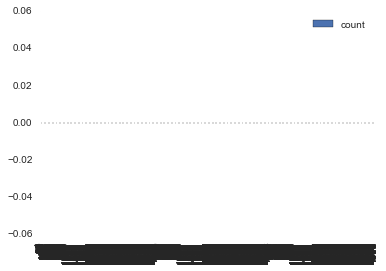

In [51]:
df_service_time['count'] = df_service_time.groupby(['service_required']).count()

df_service_time.plot(kind='bar');

In [43]:
df_service_time_count.dtypes



dtype('int64')

In [23]:
sorter = ['Morning', 'Afternoon','Evening']
sorterIndex = dict(zip(sorter,range(len(sorter))))

sorter2 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex2 = dict(zip(sorter2,range(len(sorter2))))

df5['Time_Rank'] = df5['Time of Day'].map(sorterIndex)
df5['Day_Rank'] = df5['preferred_appt_day_week'].map(sorterIndex2)

df5 = df5.set_index(['Day_Rank', 'Time_Rank'])
#df5['Time of Day2'] = df5[df5.columns['Time_Rank', 'Time of Day'].apply(lambda x: '-'.join(x.dropna().astype(int).astype(str)),axis=1)
df5.head()

preferred_appt_day_week Time of Day  count
Day_Rank Time_Rank                                           
4        1                          Friday   Afternoon    286
         2                          Friday     Evening    220
         0                          Friday     Morning    258
0        1                          Monday   Afternoon    275
         2                          Monday     Evening    323

In [ ]:
df8 = df7.sort_values(['Day_Rank', 'Time_Rank'], ascending = [True, True])
df9 = df8.reset_index(drop=True)
df9.head()

In [ ]:
total_bookings = df9.pivot_table('count', index='Time of Day',columns='preferred_appt_day_week', aggfunc=sum)

#df8.reindex(df_pivot['count'].sort_values)
#df = df.reindex(df_pivot['Value'].sort_values(by=2012, ascending=False).index)
#df9 = df8.reindex(df_pivot['Value'].sort_values(by=(['Day_Rank', 'Time_Rank'], ascending = [True, True]).index))

In [ ]:
total_births = names.pivot_table('births', index='year',columns='name', aggfunc=sum)


In [ ]:
subset = total_bookings[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

In [ ]:
total_bookings.d

In [ ]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of booking')

In [ ]:
%reset

In [ ]:
df5.head()